In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx 
import json 
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
import backboning 
from backboning import backboning as bb

In [5]:
table, nnodes, nnedges = bb.read('../data/tuscany_backboned.csv',column_of_interest='w',sep= ' ', undirected = True)

In [6]:
nc_table = bb.noise_corrected(table)

Calculating NC score...


In [17]:
nc_backbone = bb.thresholding(nc_table, 600)
len(nc_backbone)

46879

In [18]:
len(set(nc_backbone.src.append(nc_backbone.trg)))

14978

In [82]:
bb.write(nc_backbone,'tuscany_backboned.weighted.edgelist' , "nc","../data/")

In [25]:
nc_table.corr()

,src,trg,nij,score,sdev_cij
src,1.000000,0.160430,-0.002946,0.012753,-0.001771
trg,0.160430,1.000000,0.006577,0.038881,-0.022777
nij,-0.002946,0.006577,1.000000,0.075032,-0.149231
score,0.012753,0.038881,0.075032,1.000000,-0.592139
sdev_cij,-0.001771,-0.022777,-0.149231,-0.592139,1.000000


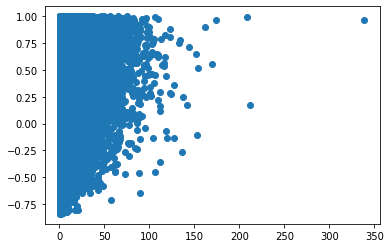

In [80]:
plt.scatter(table.nij,nc_table.score)

In [66]:
nc_backbone.to_csv('../data/tucany_backboned.csv', index=False, sep=' ', columns=['src','trg','nij'])

In [67]:
G = nx.read_weighted_edgelist(f'../data/tuscany_backboned.weighted.edgelist')

In [76]:

weights = [G.edges[edge]['weight'] for edge in G.edges()]
maxW = max(weights) 
for edge in G.edges():
    G.edges[edge]['dissimilarity'] =  10000 - G.edges[edge]['weight']

In [69]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components[1:]])
print('average componets size: ', avg_size)
print(len(components))
print([len(c) for c in components[:20]],'etc...')

C = G.subgraph(components[0])

average componets size:  2.176470588235294
35
[15003, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] etc...


In [70]:
import pandas as pd
df = pd.read_csv("../data_collection/data/tuscany.csv",index_col=0)

for node in C.nodes():
    C.nodes[node]['name'] = df.loc[int(node),'name']
    
df.head()

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
0,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,False,43.851350,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0
1,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,True,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0
2,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,False,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0
3,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,False,43.896214,11.321173,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0
4,1499,Beach Bar @PuntAla,Punta Ala,False,/Restaurant_Review-g194871-d19315573-Reviews-B...,2.5,2,1.0,Beach Bar @PuntAla,grosseto,...,False,42.841410,10.775602,"Italian, Mediterranean","Lunch, Brunch, Drinks",NaN,32Q_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194871-d19315573-Reviews-B...,1


In [71]:
def plot_kcentral(G,dictionary,k=10):
    sorted_dictionary =  sorted(dictionary.items(), key=lambda x: x[1],reverse = True)
    nodes, values = zip(*sorted_dictionary)
    nodes = nodes[:k]
    values = values[:k]
    names = [G.nodes[node]['name'] for node in nodes]
    
    plt.figure(figsize=(20,5))
    plt.bar(names, values, color=sns.color_palette('ocean',k))
    plt.xticks(rotation=25)

In [72]:
degree_centrality = nx.degree_centrality(C)

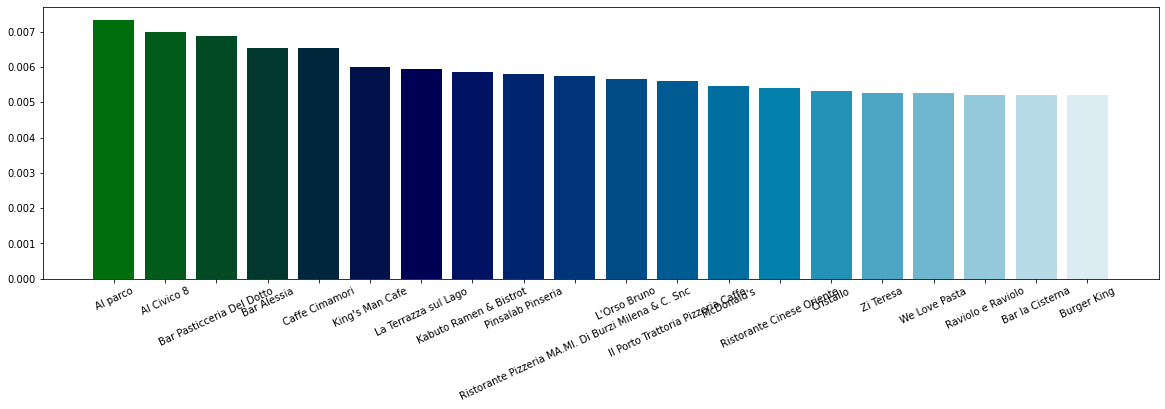

In [73]:
plot_kcentral(G,degree_centrality,20)

In [81]:
df[df.name=='Al parco']

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
13504,1098,Al parco,Arezzo,True,/Restaurant_Review-g194673-d3165165-Reviews-Al...,3.0,69,1.0,Al parco,arezzo,...,False,43.45841,11.8802,"Italian, Pizza",Lunch,NaN,3B8_https://maps.google.com/maps?saddr=&daddr=...,arezzo,/Restaurant_Review-g194673-d3165165-Reviews-Al...,1


In [74]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight=None, max_iter=1000)

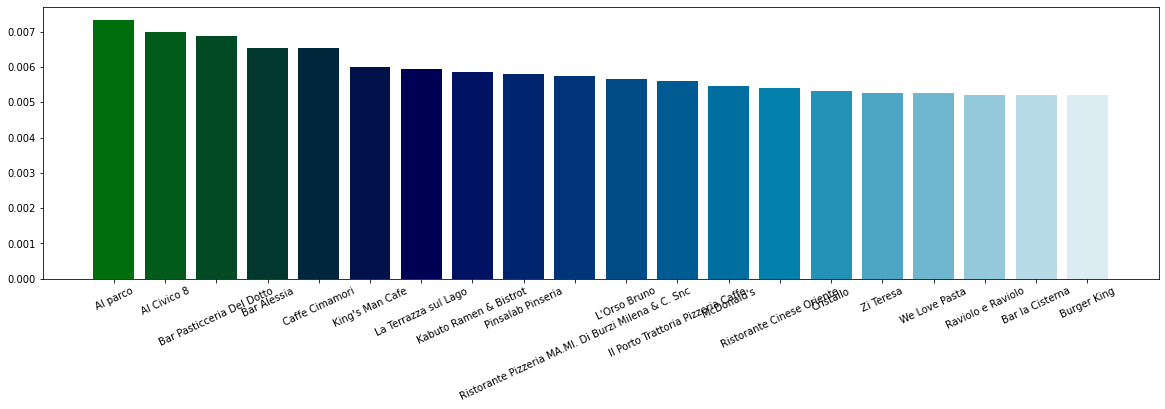

In [75]:
plot_kcentral(G,degree_centrality,20)

In [56]:
katz_centrality = nx.katz_centrality(G, weight='dissimilarity', max_iter=200)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 200 iterations')

In [ ]:
plot_kcentral(G,katz_centrality)